In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [2]:
df=pd.read_csv(r"C:\Users\vmegh\Desktop\SIP\spam.csv",encoding='cp1252')
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#handle duplicates
df.duplicated().sum()

403

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5169, 5)

In [10]:
# Check the column names in your DataFrame
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [11]:
df.rename(columns={"v1": "Target","v2": "Text"}, inplace = True)
df

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [12]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace = True)

In [13]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

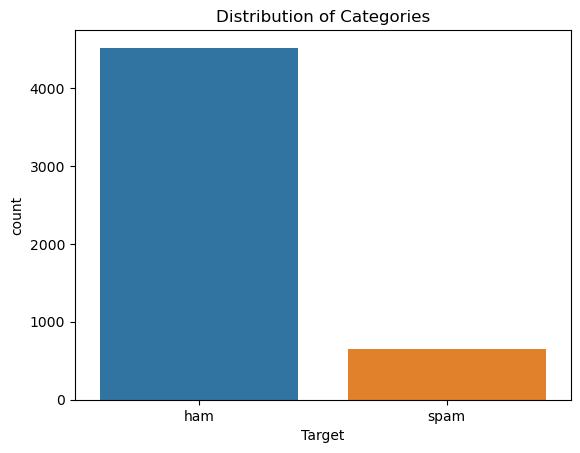

In [23]:

# Assuming 'Target' is the column containing categories
sns.countplot(data=df, x='Target')  # Replace 'df' with your DataFrame and 'Target' with your column name
plt.title('Distribution of Categories')
plt.show()


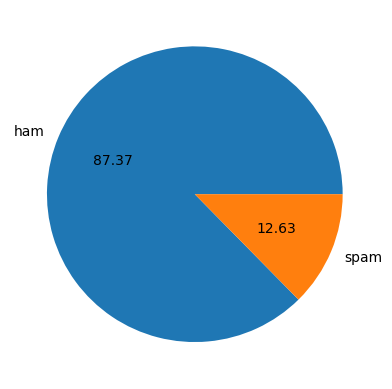

In [24]:
plt.pie(df['Target'].value_counts(),autopct='%0.2f',labels=['ham','spam'])
plt.show()

In [26]:
LE = LabelEncoder()

df['Target'] = LE.fit_transform(df['Target'])
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [31]:
import nltk
nltk.download('punkt')

# Total No. of Characters in Data
df["characters"] = df["Text"].apply(len)
# Total No. of Words in Data
df["word"] = df["Text"].apply(lambda x:len( nltk.word_tokenize(x)))
# Total No. of Sentence
df["sentence"] = df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vmegh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,Target,Text,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


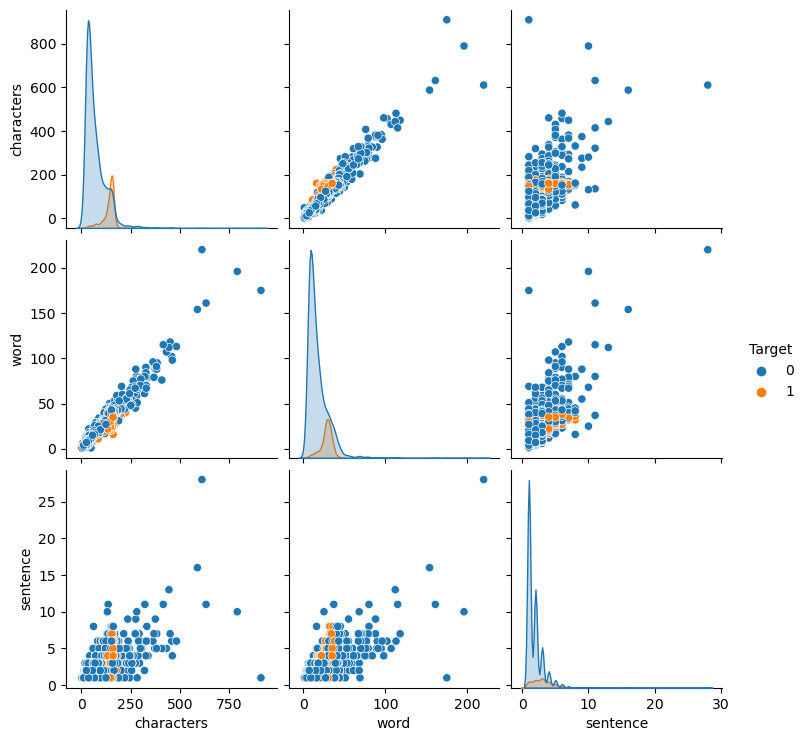

In [34]:
sns.pairplot(df,hue="Target")

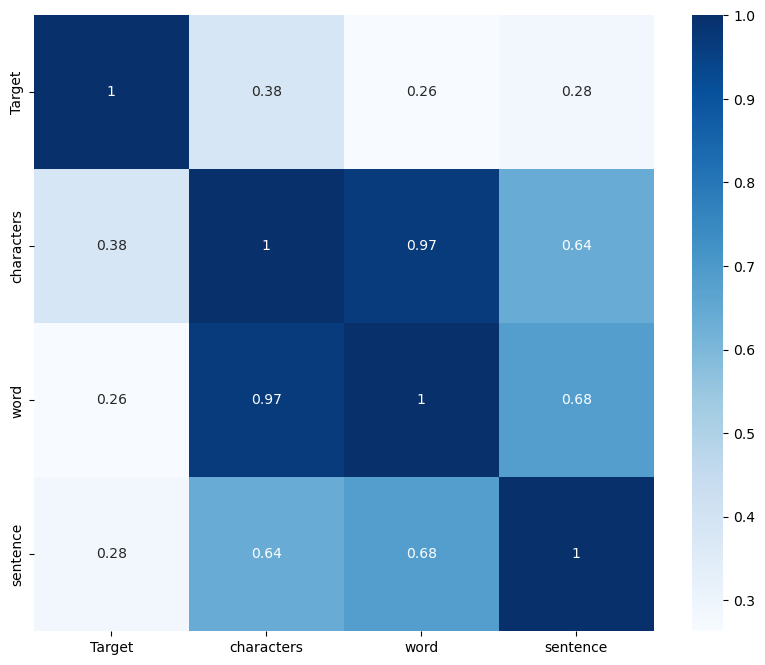

In [38]:
cmap = 'Blues'
# Create the heatmap with the specified colormap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, cmap=cmap)
# Show the plot
plt.show()

In [39]:
# Lowercase the text and remove punctuation.
df['Text'] = df['Text'].str.lower().str.replace('[^\w\s]', '')

# Download stopwords from NLTK and remove them from the text.
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['new_input'] = df['Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vmegh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


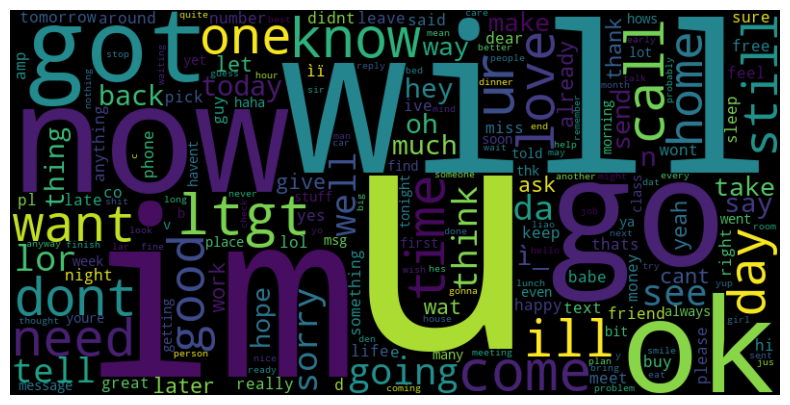

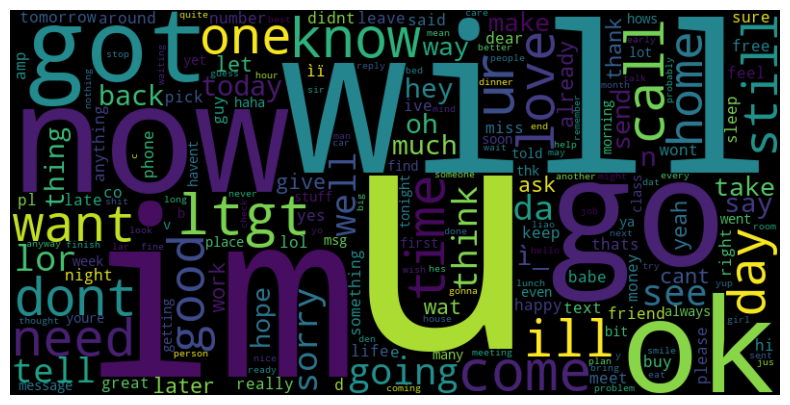

In [40]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)


# Wordcloud for SPAM
spam_wc = wc.generate(df[df["Target"] ==1]["Text"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["Target"] ==0]["Text"].str.cat(sep=" "))
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

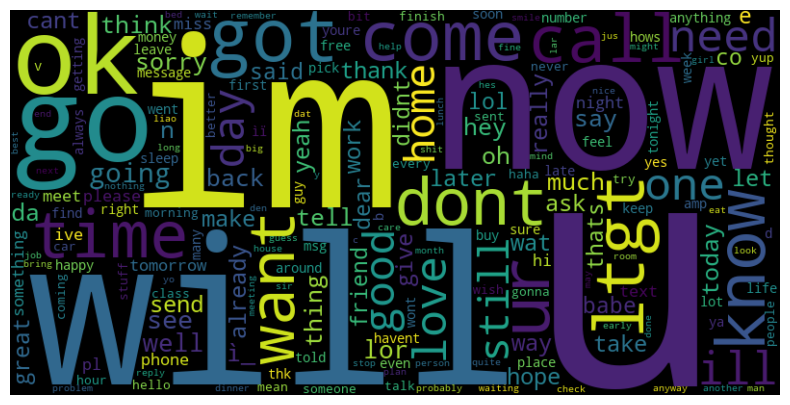

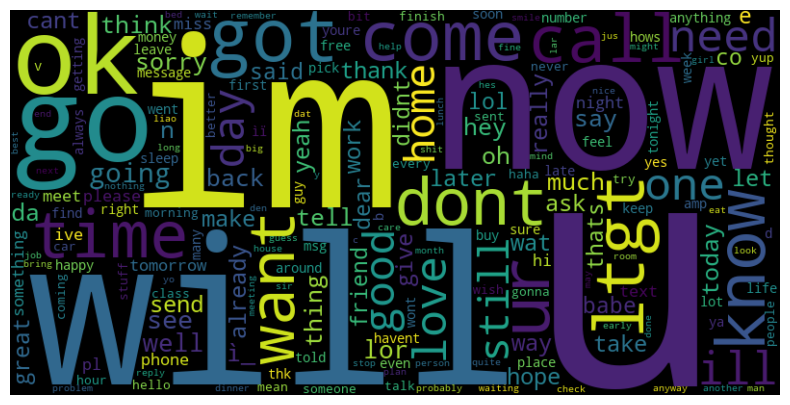

In [41]:
# Wordcloud for SPAM
spam_wc_1 = wc.generate(df[df["Target"] ==1]["Text"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc_1 = wc.generate(df[df["Target"] ==0]["Text"].str.cat(sep=" "))
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc_1, interpolation="bilinear")
plt.axis("off")
plt.show()
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc_1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
x = df['Text']
y = df['Target']

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
tfidf_vectorizer = TfidfVectorizer()
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)
print(xtrain_tfidf)
print(xtest_tfidf)

  (0, 3897)	0.5942121235598992
  (0, 2819)	0.5311533100428042
  (0, 4932)	0.2193695280291282
  (0, 7883)	0.36014288771115976
  (0, 7253)	0.4323912858145411
  (1, 7212)	0.43386305595808833
  (1, 5257)	0.47233387091060275
  (1, 7245)	0.4108305101965002
  (1, 780)	0.4848884787956034
  (1, 7903)	0.42984301563278154
  (2, 7296)	0.28353449951161386
  (2, 5030)	0.35348672555950095
  (2, 5229)	0.2661896008784042
  (2, 4425)	0.5697244583420985
  (2, 7754)	0.5697244583420985
  (2, 7212)	0.27317851664748727
  (3, 1673)	0.2744301326820843
  (3, 5302)	0.11625172662906923
  (3, 49)	0.26154300071358394
  (3, 4804)	0.2174816054870084
  (3, 1670)	0.11073207938645858
  (3, 7506)	0.22662517113179576
  (3, 246)	0.2202471383913272
  (3, 4755)	0.18438047482094808
  (3, 5151)	0.26154300071358394
  :	:
  (4133, 7193)	0.20553750255710077
  (4133, 4430)	0.23857941038372854
  (4133, 1717)	0.1993885775505395
  (4133, 6851)	0.19404414095240022
  (4133, 5198)	0.1354857897954436
  (4133, 7296)	0.17581733638501493
  

In [72]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
}

In [73]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)
# Independent Feature
X = tfidv.fit_transform(df["new_input"]).toarray()
# Dependent Feature
Y = df["Target"].values
# Performing Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [74]:
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, Y_train, X_test, Y_test)
    
    acc_s.append(accuracy)
    pre_s.append(precision)

### Result

In [75]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(), 
                          "Accuracy": acc_s, 
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.971954,1.000000
2,Bernoulli NB,0.981625,1.000000
6,KNN,0.904255,1.000000
8,Random Forest,0.973888,1.000000
4,SVC,0.970986,0.990909
3,Logistic Regression,0.954545,0.978947
9,ETC,0.977756,0.975207
10,Ada Boost,0.958414,0.952381
12,XGB,0.969052,0.949153
11,Gradient Boost,0.955513,0.933962


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Target      5169 non-null   int32 
 1   Text        5169 non-null   object
 2   characters  5169 non-null   int64 
 3   word        5169 non-null   int64 
 4   sentence    5169 non-null   int64 
 5   new_input   5169 non-null   object
dtypes: int32(1), int64(3), object(2)
memory usage: 391.5+ KB


In [111]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data=pd.read_csv(r"C:\Users\vmegh\Desktop\SIP\spam.csv",encoding='cp1252')

In [112]:
print(raw_mail_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [113]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [114]:
# printing the first 5 rows of the dataframe
mail_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [115]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 5)

In [139]:
mail_data.rename(columns={"v1": "Category","v2": "Message"}, inplace = True)
mail_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace = True)
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [140]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [120]:
df.rename(columns={"v1": "Category","v2": "Message"}, inplace = True)
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace = True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [141]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [142]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [143]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


#### Splitting the data into training data & test data

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [145]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


#### Feature Extraction

In [146]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [147]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [148]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

### Training the Model

* Logistic Regression

In [149]:
model = LogisticRegression()

In [150]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

* Evaluating the trained model

In [151]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [152]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9661207089970832


In [153]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [154]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9623318385650225


### Building a Predictive System

In [155]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [156]:
input_mail = ["New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today!"]	
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')


[0]
Spam mail
